In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

if (dir := str(Path(os.getcwd()).parent)) not in sys.path:
    sys.path.append(dir)

from mylib.metrics import Metrics, CMetrics

In [2]:
SEED = 73

np.random.seed = SEED

In [3]:
wine = pd.read_csv('../data/wine_preprocessed.csv', sep=';')
rain = pd.read_csv('../data/rain_preprocessed.csv', sep=';')

In [4]:
X_wine = wine.drop(['quality'], axis=1)
y_wine = wine['quality']
print(X_wine.shape, y_wine.shape)

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.33)

(6497, 12) (6497,)


In [5]:
print(rain['RainTomorrow'].value_counts())

rain0 = rain[rain['RainTomorrow'] == 0]
rain1 = rain[rain['RainTomorrow'] == 1]

rain0 = resample(rain0,
                 replace=False,
                 n_samples=len(rain1),
                 random_state=73)

rain = pd.concat([rain1, rain0])
print(rain['RainTomorrow'].value_counts())

X_rain = rain.drop(columns=['RainTomorrow'])
y_rain = rain['RainTomorrow']
print(X_rain.shape, y_rain.shape)

X_rain_train, X_rain_test, y_rain_train, y_rain_test = train_test_split(X_rain, y_rain, test_size=0.33)

0    113583
1     31877
Name: RainTomorrow, dtype: int64
1    31877
0    31877
Name: RainTomorrow, dtype: int64
(63754, 23) (63754,)


In [6]:
print_r_metrics = lambda true, pred: Metrics(true, pred)()
print_c_metrics = lambda true, pred: CMetrics(true, pred)()

## Обучение

### Регрессия

In [30]:
X_wine_train.shape

(4352, 12)

In [39]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation="elu", input_shape=(12,)),
        tf.keras.layers.Dense(24, activation="elu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="elu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation="relu"),
    ]
)

model_regression.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                416       
                                                                 
 dense_13 (Dense)            (None, 24)                792       
                                                                 
 dropout_6 (Dropout)         (None, 24)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                400       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,625
Trainable params: 1,625
Non-traina

In [43]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")

In [44]:
model_regression.fit(X_wine_train, y_wine_train, epochs=100)

Epoch 1/100
136/136 [==============================] - 2s 3ms/step - loss: 0.7262
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6266
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6620
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6300
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5901
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6019
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6839
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6304
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 0.6117
Epoch 10/100
136/136 [==============================] - 0s 4ms/step - loss: 0.5850
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5969
Epoch 12/100
136/136 [==============================] - 0s 3ms/step - loss: 0.5996
Epoch 13/100


In [45]:
print_r_metrics(y_wine_test, model_regression.predict(X_wine_test))

68/68 [==============================] - 0s 2ms/step
MAE:	1687.5040348706546
MSE:	2019.6200135268393
RMSE:	44.94018261563742
MAPE:	299.7081361754011
R^2:	-2671.4837398109553


### Классификация

In [7]:
X_rain_train.shape

(42715, 23)

In [8]:
model_classification = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation="relu", input_shape=(23,)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(40, activation="relu"),
        tf.keras.layers.Dense(24, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(2, activation="softmax"),
    ]
)

model_classification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                2600      
                                                                 
 dense_3 (Dense)             (None, 24)                984       
                                                                 
 dense_4 (Dense)             (None, 16)                400       
                                                                 
 dense_5 (Dense)             (None, 2)                 3

In [11]:
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="sparse_categorical_crossentropy")

In [12]:
model_classification.fit(X_rain_train, y_rain_train, epochs=5)

Epoch 1/5
1335/1335 [==============================] - 9s 4ms/step - loss: 0.5128
Epoch 2/5
1335/1335 [==============================] - 5s 4ms/step - loss: 0.4839
Epoch 3/5
1335/1335 [==============================] - 4s 3ms/step - loss: 0.4769
Epoch 4/5
1335/1335 [==============================] - 5s 3ms/step - loss: 0.4747
Epoch 5/5
1335/1335 [==============================] - 5s 3ms/step - loss: 0.4706


In [19]:
print_c_metrics(y_rain_test, np.argmax(model_classification.predict(X_rain_test), axis=1))

658/658 [==============================] - 2s 3ms/step
	precision	recall	f1-score
0	     0.80	  0.74	    0.77
1	     0.76	  0.81	    0.79
accuracy			    0.78



## Многослойный Персептрон

In [7]:
from mylib.perceptron import Perceptron
from mylib.layer.layer import Layer

### R: mse

In [64]:
pr = (
    Perceptron([
        Layer(16, 'tanh', 12),
        # Layer(16, 'relu'),
        Layer(8, 'sigmoid'),
        Layer(4, 'sigmoid'),
        Layer(1, 'relu'),
    ])
    .compile(loss='mse')
    .fit(np.array(X_wine_train), np.array(y_wine_train), epochs=15, batch_size=256)
)
pr_pred = pr.predict(np.array(X_wine_test))[:, 0]
pr_pred

array([5.87500905, 5.83848283, 5.87500903, ..., 5.87370885, 5.79588851,
       5.86574808])

In [65]:
print_r_metrics(y_wine_test, pr_pred)

MAE:	0.691066870522857
MSE:	0.7749832920765771
RMSE:	0.8803313535689713
MAPE:	0.12412422098855552
R^2:	0.0021795118221059617


### C: mse

In [137]:
pc = (
    Perceptron([
        Layer(16, 'tanh', 23),
        Layer(8, 'sigmoid'),
        # Layer(8, 'sigmoid'),
        Layer(2, 'softmax'),
    ])
    .compile(loss='mse')
    .fit(np.array(X_rain_train), np.array(y_rain_train), epochs=8, batch_size=32)
)
pc_pred = pc.predict(np.array(X_rain_test))
pc_pred

array([[0.85626117, 0.14373883],
       [0.47738368, 0.52261632],
       [0.16384484, 0.83615516],
       ...,
       [0.63565897, 0.36434103],
       [0.20501961, 0.79498039],
       [0.72231315, 0.27768685]])

In [138]:
print_c_metrics(y_rain_test, np.argmax(pc_pred, axis=1))

	precision	recall	f1-score
0	     0.60	  0.79	    0.68
1	     0.69	  0.47	    0.56
accuracy			    0.63



### C: sparse_categorical_crossentropy

In [130]:
pc_ce = (
    Perceptron([
        Layer(16, 'tanh', 23),
        Layer(8, 'sigmoid'),
        Layer(2, 'softmax'),
    ])
    .compile(loss='sparse_categorical_crossentropy')
    .fit(np.array(X_rain_train), np.array(y_rain_train), epochs=8, batch_size=32)
)
pc_pred_ce = pc_ce.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(pc_pred_ce, axis=1))

	precision	recall	f1-score
0	     0.66	  0.52	    0.58
1	     0.60	  0.73	    0.66
accuracy			    0.62



## Оптимизаторы

In [8]:
from mylib.optimizer.SGD import SGD
from mylib.optimizer.momentum import Momentum
from mylib.optimizer.RMSProp import RMSProp
from mylib.optimizer.adam import Adam

In [21]:
impulse = (
    Perceptron([
        Layer(16, 'leaky_relu', 23),
        Layer(8, 'sigmoid'),
        Layer(2, 'softmax'),
    ])
    .compile(optimizer=Momentum(0.001, 0.1), loss='sparse_categorical_crossentropy')
    .fit(np.array(X_rain_train), np.array(y_rain_train), epochs=25, batch_size=64)
)
impulse_pred = impulse.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(impulse_pred, axis=1))

	precision	recall	f1-score
0	     0.72	  0.59	    0.65
1	     0.65	  0.77	    0.71
accuracy			    0.68



In [26]:
rmsprop = (
    Perceptron([
        Layer(64, 'tanh', 23),
        Layer(32, 'leaky_relu'),
        Layer(16, 'tanh'),
        Layer(8, 'leaky_relu'),
        Layer(2, 'softmax'),
    ])
    .compile(optimizer=RMSProp(learning_rate=0.001, beta=0.8), loss='sparse_categorical_crossentropy')
    .fit(np.array(X_rain_train), np.array(y_rain_train), epochs=25, batch_size=64)
)
rmsprop_pred = rmsprop.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(rmsprop_pred, axis=1))

	precision	recall	f1-score
0	     0.57	  0.53	    0.55
1	     0.57	  0.60	    0.58
accuracy			    0.57



In [15]:
rmsprop = (
    Perceptron([
        Layer(64, 'tanh', 23),
        Layer(32, 'leaky_relu'),
        Layer(16, 'tanh'),
        # Layer(8, 'leaky_relu'),
        Layer(2, 'softmax'),
    ])
    .compile(optimizer=RMSProp(learning_rate=0.001, beta=0.8), loss='sparse_categorical_crossentropy')
    .fit(np.array(X_rain_train), np.array(y_rain_train), epochs=25, batch_size=64)
)
rmsprop_pred = rmsprop.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(rmsprop_pred, axis=1))

	precision	recall	f1-score
0	     0.55	  0.55	    0.55
1	     0.56	  0.56	    0.56
accuracy			    0.56



In [13]:
adam = (
    Perceptron([
        Layer(16, 'leaky_relu', 23),
        Layer(8, 'sigmoid'),
        Layer(2, 'softmax'),
    ])
    .compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
    .fit(np.array(X_rain_train), np.array(y_rain_train), epochs=25, batch_size=64)
)
adam_pred = adam.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(adam_pred, axis=1))

	precision	recall	f1-score
0	     0.58	  0.55	    0.56
1	     0.57	  0.60	    0.58
accuracy			    0.57



In [89]:
mse_optimizer = (
    Perceptron([
        Layer(10, 'sigmoid', 12),
        Layer(1, 'relu'),
    ])
    .compile(optimizer=Momentum(learning_rate=0.001), loss='mse')
    .fit(np.array(X_wine_train), np.array(y_wine_train), epochs=25, batch_size=32)
)
mse_optimizer_pred = mse_optimizer.predict(np.array(X_wine_test))[:, 0]
mse_optimizer_pred

array([5.77163065, 5.77162907, 5.77162924, ..., 6.71558172, 5.77167137,
       5.77162271])

In [90]:
print_r_metrics(y_wine_test, mse_optimizer_pred)

MAE:	0.8206837567178589
MSE:	1.0872416675486392
RMSE:	1.0427088124441257
MAPE:	0.14708235784249127
R^2:	-0.48459150603252454


## Тесты с loss

In [9]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

	precision	recall	f1-score
0	     0.74	  0.16	    0.26
1	     0.53	  0.94	    0.68
accuracy			    0.55



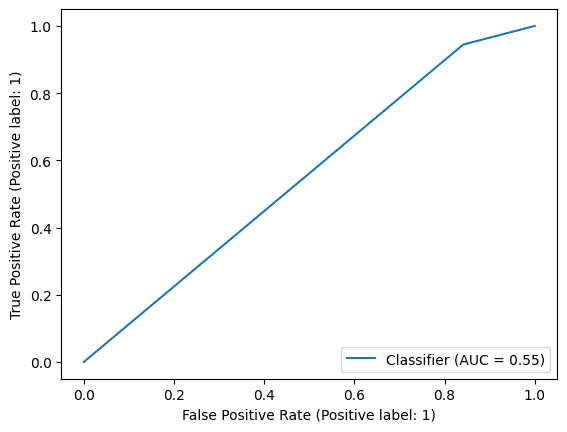

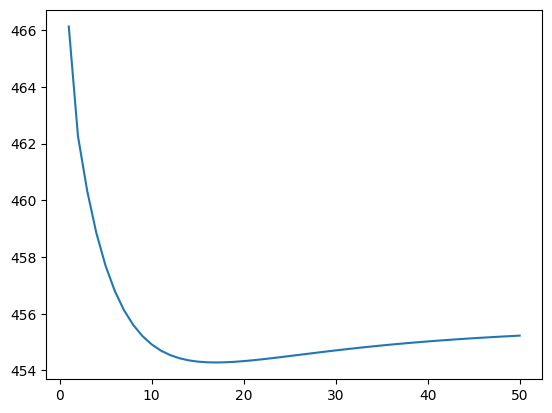

In [18]:
amogus = (
    Perceptron([
        Layer(16, 'linear', 23),
        Layer(8, 'sigmoid'),
        Layer(2, 'softmax'),
    ])
    .compile(optimizer=Momentum(2, 0.8), loss='sparse_categorical_crossentropy')
)
losses = amogus.fit(np.array(X_rain_train), np.array(y_rain_train), epochs=50, batch_size=64, return_loss=True)
amogus_pred = amogus.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(amogus_pred, axis=1))

RocCurveDisplay.from_predictions(y_rain_test, np.argmax(amogus_pred, axis=1))
plt.show()

# plt.plot(*zip(*list(enumerate(losses, start=1))))
plt.plot(range(1, len(losses) + 1),  losses)
plt.show()

	precision	recall	f1-score
0	     0.67	  0.63	    0.65
1	     0.65	  0.69	    0.67
accuracy			    0.66



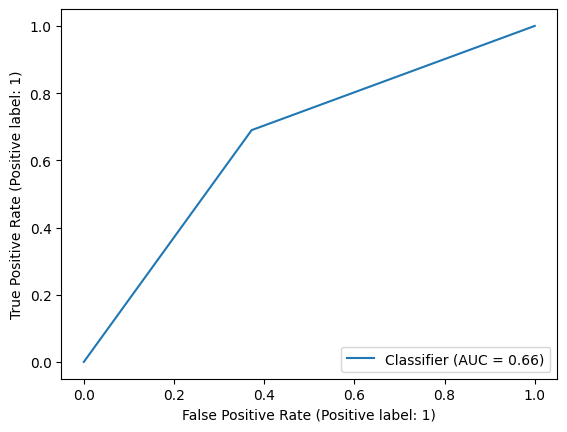

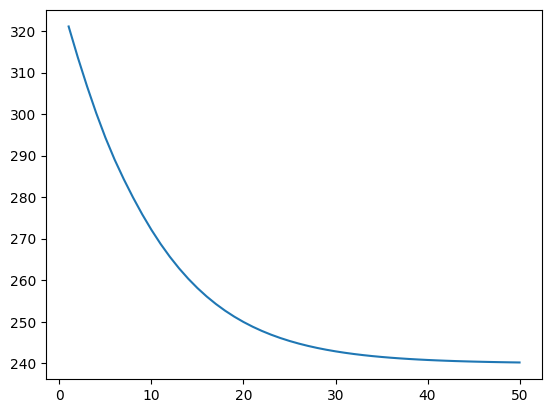

In [24]:
amogus = (
    Perceptron([
        Layer(16, 'linear', 23),
        Layer(8, 'sigmoid'),
        Layer(2, 'softmax'),
    ])
    .compile(optimizer=SGD(), loss='sparse_categorical_crossentropy')
)
losses = amogus.fit(np.array(X_rain_train), np.array(y_rain_train), epochs=50, batch_size=128, return_loss=True)
amogus_pred = amogus.predict(np.array(X_rain_test))
print_c_metrics(y_rain_test, np.argmax(amogus_pred, axis=1))

RocCurveDisplay.from_predictions(y_rain_test, np.argmax(amogus_pred, axis=1))
plt.show()

plt.plot(range(1, len(losses) + 1),  losses)
plt.show()